In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amitedke","key":"6bba14da117b9df6d0889e4329c3110e"}'}

In [2]:
#!pip install -q kaggle

In [3]:
!mkdir -p ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!mkdir traffic_sign_dataset

In [7]:
%cd traffic_sign_dataset

/content/traffic_sign_dataset


In [8]:
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign  
%cd ..

 96% 588M/612M [00:04<00:00, 127MB/s]
100% 612M/612M [00:04<00:00, 144MB/s]
/content


In [9]:
!unzip traffic_sign_dataset/gtsrb-german-traffic-sign.zip -d traffic_sign_dataset

!rm traffic_sign_dataset/gtsrb-german-traffic-sign.zip

!rm -rf traffic_sign_dataset/Meta

!rm -rf traffic_sign_dataset/meta

!rm -rf traffic_sign_dataset/test

!rm -rf traffic_sign_dataset/train

!rm traffic_sign_dataset/Meta.csv

Streaming output truncated to the last 5000 lines.
  inflating: traffic_sign_dataset/train/5/00005_00053_00010.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00011.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00012.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00013.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00014.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00015.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00016.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00017.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00018.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00019.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00020.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00021.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00022.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00023.png  
  inflating: traffic_sign

In [10]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread #to extract images
import random
from PIL import Image

In [11]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential


In [13]:
from tensorflow.keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPool2D

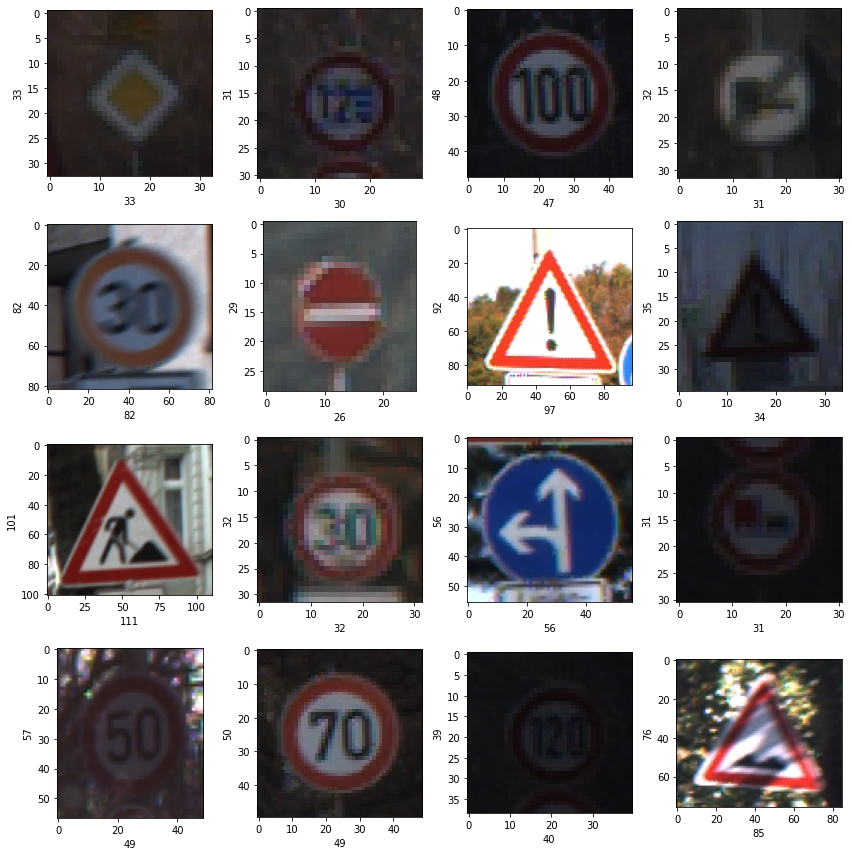

In [14]:
plt.figure(figsize=(12,12))
path="traffic_sign_dataset/Test"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
     rand_img=imread(path + '/' + random.choice(sorted(os.listdir(path))))
        plt.imshow(rand_img)
        plt.xlabel(rand_img.shape[1],fontsize=10)
        plt.ylabel(rand_img.shape[0],fontsize=10)

In [15]:
images=[]
label_id=[]

for i in range(43):
     labels="traffic_sign_dataset/Train" + '/{0}'.format(i)
        image_path=os.listdir(labels)
        for x in image_path:
             img= Image.open(labels + '/' +x)
            img=img.resize((50,50))
            img=np.array(img)
            images.append(img)
             label_id.append(i)



In [16]:
images=np.array(images)
images=images/255


In [17]:
label_id=np.array(label_id)
label_id.shape

(39209,)

In [18]:
images.shape

(39209, 50, 50, 3)

In [19]:
#train test split
X_train,X_val,y_train,y_val=train_test_split(images,label_id,test_size=0.2,random_state=42)

In [20]:
#fibracation of CNN
model=Sequential()


In [21]:
#convolution layercode
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=X_train.shape[1:],activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add( Dropout(0.5))


In [22]:
#Poolig Layer code:
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=X_train.shape[1:],activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add( Dropout(0.5))



In [23]:
#Image classfication Layer code
model.add(Flatten())
model.add(Dense(128, activation='relu'))#f(x)=max(0,x)
model.add( Dropout(0.5))
model.add(Dense(43, activation='softmax'))

In [24]:
images.ndim

4

In [25]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 25, 25, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0

In [27]:
model.fit(X_train,y_train,epochs=10,batch_size=128,validation_data=(X_val,y_val),verbose=2)

Epoch 1/10
246/246 - 189s - loss: 2.4255 - accuracy: 0.3303 - val_loss: 1.1738 - val_accuracy: 0.7198 - 189s/epoch - 769ms/step
Epoch 2/10
246/246 - 190s - loss: 1.0539 - accuracy: 0.6689 - val_loss: 0.3862 - val_accuracy: 0.9234 - 190s/epoch - 774ms/step
Epoch 3/10
246/246 - 192s - loss: 0.6548 - accuracy: 0.7942 - val_loss: 0.2467 - val_accuracy: 0.9563 - 192s/epoch - 782ms/step
Epoch 4/10
246/246 - 190s - loss: 0.4882 - accuracy: 0.8463 - val_loss: 0.1674 - val_accuracy: 0.9707 - 190s/epoch - 772ms/step
Epoch 5/10
246/246 - 190s - loss: 0.4169 - accuracy: 0.8673 - val_loss: 0.1229 - val_accuracy: 0.9778 - 190s/epoch - 771ms/step
Epoch 6/10
246/246 - 190s - loss: 0.3567 - accuracy: 0.8870 - val_loss: 0.0961 - val_accuracy: 0.9802 - 190s/epoch - 770ms/step
Epoch 7/10
246/246 - 189s - loss: 0.3112 - accuracy: 0.8999 - val_loss: 0.0707 - val_accuracy: 0.9848 - 189s/epoch - 767ms/step
Epoch 8/10
246/246 - 190s - loss: 0.2874 - accuracy: 0.9074 - val_loss: 0.0668 - val_accuracy: 0.9838 - 

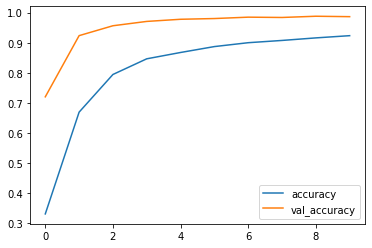

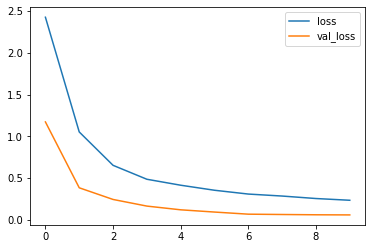

In [28]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy','val_accuracy']].plot()
evaluation[['loss','val_loss']].plot()

In [29]:
test_path = 'traffic_sign_dataset/Test'
!rm traffic_sign_dataset/Test/GT-final_test.csv

In [30]:
from PIL import Image

def scaling(test_images, test_path):
  images = []

  image_path = test_images

  for x in image_path:
    img = Image.open(test_path + '/' + x)
    img = img.resize((50,50))
    img = np.array(img)
    images.append(img)
  
  images = np.array(images)
  images = images/255

  return images

In [31]:
test_images = scaling(sorted(os.listdir(test_path)),test_path)

In [32]:
test = pd.read_csv('traffic_sign_dataset/Test.csv')
y_test = test['ClassId'].values

In [33]:
# Store the Labels:
all_labels = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)',
              'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)',
              'Speed limit (120km/h)','No passing','No passing for vechiles over 3.5 metric tons',
              'Right-of-way at the next intersection','Priority road','Yield','Stop','No vechiles',
              'Vechiles over 3.5 metric tons prohibited','No entry','General caution','Dangerous curve to the left',
              'Dangerous curve to the right','Double curve','Bumpy road','Slippery road','Road narrows on the right',
              'Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow',
              'Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',
              'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',
              'End of no passing','End of no passing by vechiles over 3.5 metric']

In [34]:
img = Image.open(test_path + '/00175.png')
img

In [35]:
#Print the label automatically on its own:
print("Original Label : ",all_labels[y_test[175]])

Original Label :  Speed limit (30km/h)
